# Machine Learning Project - Christopher Collins - G00387822

## Instructions
In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. Your submission must be in the form of a git repository containing, at a minimum, the following items:

*1. Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.

*2. Python script that runs a web service based on the model, as above.

*3. Dockerfile to build and run the web service in a container.

*4. Standard items in a git repository such as a README.

# My Model And Its Accuracy

![AlgorithmStrengths](AlgorithmStrengths.png)


If you don't have time to read my notebook. Here is a summary of my model and it's accuracy. I managed to achieve a model with what I consider a reasonable degree of accuracy using some adjustments to simple linear regression.

A lot of the theory groundwork for my algorithm can also be found in my Fundamentals For Data Analysis Project which is a bit neater than some of my Jupyter Notebook work below https://github.com/g00387822/Fundamentals_Data_Analysis_Project/blob/main/Project%202020%20Fundamentals%20of%20Data%20Analysis.ipynb

Looking at the raw data it is noted that wind speeds 0.275 and below generate no power, wind speeds 24.499 generate no power.
There are industry reasons for this. So if a user types a wind speed within those ranges, I will dismiss it and handle their query with an if statement that will return the value of zero.

Looking at the raw data it is noted that there are are days of wind between the above speeds and no power produced. In my final model days that produce zero power are stripped out. There are industry reasons such as wind turbines being shut for maintenance or not enough demand from the grid. In my modeling I am not interested in including zero power production on windy days.

Even with or without filtering out zero power days, I found it impossible to make reasonable predictions from simple linear regression prediction or polynomial regression prediction on the whole dataset alone, 


![PredictionTable](PredictionTable.png)


for instance inputting 0.325 or 2mph would generate a negative value in simple linear regression prediction, and values input for prediction on higher wind speeds such as 24.399, the prediction would exceed wind speeds found in real data.

Basically within the data are days where there are power production surges, and these surges negatively impact the predictions, the further way a number is for forecasting. For example power surges in the wind speed ranges 20 - 25 mph can distort the average size of the dataset when trying to predict wind speeds for speeds such as 2mph, likewise power production values in lower wind speeds can distort making predictions for higher wind speeds.

The best linear prediction happens when you narrow the range of data being used for linear regression analysis.


**My solution can be summarised as follows**

I filtered out the zero power production days 

If a user types wind speeds equal or lower than 0.275 or higher than or equal to 24.499, it will be handled with an if statement and return 0

All other speeds, linear regression will look at the following bands of data

0.275 - 5 mph , 
'> 5 - 10 mph
'> 10 - 15 mph
'>15 - 20 mph
'>20 - 24.498 mph

So if a user inputs a wind speed between 0.275 - 5 mph, it will get a linear prediction from wind speed data betwween 0 and 5 mph.

So if a user inputs a wind speed between 5 - 10 mph, it will get a linear prediction from wind speed data betwween 5 and 10 mph.

So if a user inputs a wind speed between 10 - 15 mph, it will get a linear prediction from wind speed data betwween 10 and 15 mph.

So if a user inputs a wind speed between 15 - 20 mph, it will get a linear prediction from wind speed data betwween 15 and 20 mph.

So if a user inputs a wind speed between 20 - 25 mph, it will get a linear prediction from wind speed data betwween 20 and 24.498 mph.

I put my final code immediately below.

# My Final Code For Predicting Energy Production From Wind Speed

In [1]:
import sklearn.linear_model as lin
import pandas as pd

def do_linear_regression(data,text):

    # Load a dataset.
    text = text
    powerproduction = data
    def f(speed, p):
        return p[0] + speed * p[1]

    def predict_power_output(speed):
        return round(f(speed, p),2)

    speed = powerproduction["speed"].to_numpy()
    y = powerproduction["power"].to_numpy()

    speed = speed.reshape(-1, 1)

    model = lin.LinearRegression()
    model.fit(speed, y)
    r = model.score(speed, y)
    p = [model.intercept_, model.coef_[0]]

    return(predict_power_output(float(text)))

# Load a dataset.
df = pd.read_csv('powerproduction.csv')

# We are removing the non zero values
cleansed_data_2 = df.loc[df['power'] > 0 ]

# filtering between values see https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates



# If a user types wind speeds lower than 0.275 or equal higher than 24.499, it will be handled with an if statement and return 0

def receive_text_from_form(text):
    text = text
    if text <= 0.275:
        return 0

    if text >= 24.499:
        return 0


    #if a user inputs a wind speed between 0 - 5 mph, they will get a linear prediction from wind speed data betwween 0 and 5 mph.

    if text > 0.275 and text <= 5:
        zero_to_five = cleansed_data_2.loc[(cleansed_data_2['speed'] > 0.275) & (cleansed_data_2['speed']<= 5)]
        return do_linear_regression(zero_to_five,text)


    #if a user inputs a wind speed between 5 - 10 mph, they will get a linear prediction from wind speed data betwween 5 and 10 mph.

    if text > 5 and text <= 10:
        greater_than_five_to_ten = cleansed_data_2.loc[(cleansed_data_2['speed'] > 5) & (cleansed_data_2['speed']<= 10)]
        return do_linear_regression(greater_than_five_to_ten,text)


    #if a user inputs a wind speed between 10 - 15 mph, they will get a linear prediction from wind speed data betwween 10 and 15 mph.
        
    if text > 10 and text <= 15:
        greater_than_ten_to_fifteen = cleansed_data_2.loc[(cleansed_data_2['speed'] > 10) & (cleansed_data_2['speed']<= 15)]
        return do_linear_regression(greater_than_ten_to_fifteen,text)

    #if a user inputs a wind speed between 15 - 20 mph, they will get a linear prediction from wind speed data betwween 15 and 20 mph.

    if text > 15 and text <= 20:
        greater_than_fifteen_to_twenty = cleansed_data_2.loc[(cleansed_data_2['speed'] > 15) & (cleansed_data_2['speed']<= 20)]
        return do_linear_regression(greater_than_fifteen_to_twenty,text)

        #if a user inputs a wind speed between 20 - 25 mph, they will get a linear prediction from wind speed data betwween 20 and 25 mph.

    if text > 20 and text <= 24.498:
        greater_than_twenty_to_twenty_five = cleansed_data_2.loc[(cleansed_data_2['speed'] > 20) & (cleansed_data_2['speed']<= 24.498)]
        return do_linear_regression(greater_than_twenty_to_twenty_five,text)


In [2]:
receive_text_from_form(0.325)

4.29

In [3]:
receive_text_from_form(2)

4.22

In [4]:
receive_text_from_form(25)

0

In [5]:
receive_text_from_form(24.399)

98.86

In [6]:
receive_text_from_form(60)

0

### Functions For Measuring Data Corellation And R Relationship

#### R Relationship For Simple Linear Regression

Below is an algorithm for measuring the R Relationship Of Simple Linear Regression To The Original Dataset, the result 0.8537775037188597 shows that there is quite a strong relationship, however that relationship gets even stronger when the zero power values are stripped out, 0.9478835830699075. My reasons for stripping out the zero power values are discussed in more detail in the 'Observations Of The Data', simply put there are industry practices where turbines are turned off for a number of reasons, and these deliberate decisions make speed to power prediction algorithms unstable when zero power days are left in.

In [7]:
# https://www.w3schools.com/python/python_ml_linear_regression.asp

def analyse_simple_linear_regression_r(powerproduction):
    from scipy import stats
    import pandas as pd



    x = powerproduction['speed'].tolist()
    y = powerproduction['power'].tolist()

    slope, intercept, r, p, std_err = stats.linregress(x, y)

    print(r)


powerproduction = pd.read_csv('powerproduction.csv')
# We are removing the non zero values
cleansed_data = df.loc[df['power'] > 0 ]

analyse_simple_linear_regression_r(powerproduction)
analyse_simple_linear_regression_r(cleansed_data)

0.8537775037188597
0.9478835830699075


### Why Performing Simple Linear Analysis On Entire Section Of Data Is A Bad Idea For Predictions

If you look at the graph generated by the code below, you will see that running a line straight through the middle of the data, means that there are large parts of the data untouched by the line where a linear prediction of the coordinates of speed to power would be very out of sync with where most of the data is.

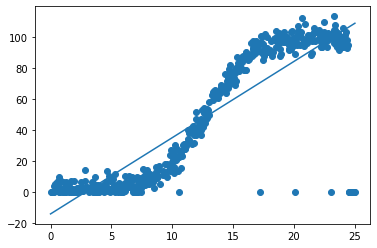

In [8]:
# https://www.w3schools.com/python/python_ml_linear_regression.asp
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

powerproduction = pd.read_csv('powerproduction.csv')

x = powerproduction['speed'].tolist()
y = powerproduction['power'].tolist()

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

### Why Performing Simple Linear Analysis On Small Segments Of Data Is A Great Idea For Predictions

You will see when I break down the data into small sections below that running a linear line through them, the line is always much closer to the data and touching the centre of data in parts, and therefore more capable of making predictions that in someway represent observations found in the real data.

### Zero to Five

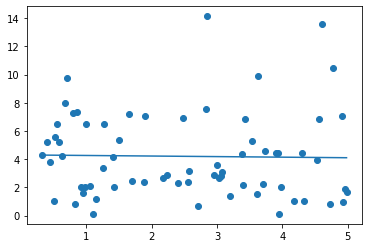

In [9]:
# https://www.w3schools.com/python/python_ml_linear_regression.asp
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

# Load a dataset.
df = pd.read_csv('powerproduction.csv')

# We are removing the non zero values
cleansed_data_2 = df.loc[df['power'] > 0 ]

zero_to_five = cleansed_data_2.loc[(cleansed_data_2['speed'] > 0.275) & (cleansed_data_2['speed']<= 5)]

x = zero_to_five['speed'].tolist()
y = zero_to_five['power'].tolist()

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()



### greater than five to ten

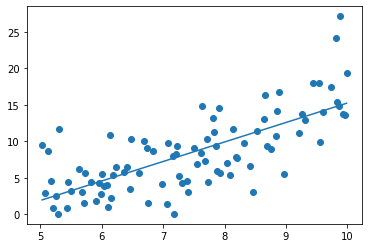

0.7257177091323912


In [10]:
# https://www.w3schools.com/python/python_ml_linear_regression.asp
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

# Load a dataset.
df = pd.read_csv('powerproduction.csv')

# We are removing the non zero values
cleansed_data_2 = df.loc[df['power'] > 0 ]

greater_than_five_to_ten = cleansed_data_2.loc[(cleansed_data_2['speed'] > 5) & (cleansed_data_2['speed']<= 10)]

x = greater_than_five_to_ten ['speed'].tolist()
y = greater_than_five_to_ten ['power'].tolist()

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

analyse_simple_linear_regression_r(greater_than_five_to_ten)

### greater than ten to fifteen

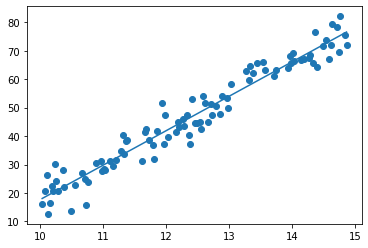

0.9718650122070693


In [11]:
# https://www.w3schools.com/python/python_ml_linear_regression.asp
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

# Load a dataset.
df = pd.read_csv('powerproduction.csv')

# We are removing the non zero values
cleansed_data_2 = df.loc[df['power'] > 0 ]

greater_than_ten_to_fifteen = cleansed_data_2.loc[(cleansed_data_2['speed'] > 10) & (cleansed_data_2['speed']<= 15)]

x = greater_than_ten_to_fifteen['speed'].tolist()
y = greater_than_ten_to_fifteen['power'].tolist()

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

analyse_simple_linear_regression_r(greater_than_ten_to_fifteen )

### greater than fifteen to twenty

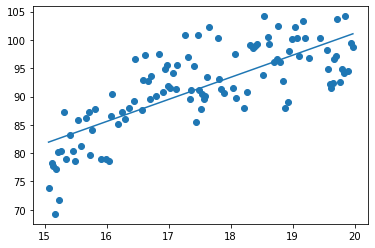

0.760884796026968


In [12]:
# https://www.w3schools.com/python/python_ml_linear_regression.asp
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

# Load a dataset.
df = pd.read_csv('powerproduction.csv')

# We are removing the non zero values
cleansed_data_2 = df.loc[df['power'] > 0 ]

greater_than_fifteen_to_twenty = cleansed_data_2.loc[(cleansed_data_2['speed'] > 15) & (cleansed_data_2['speed']<= 20)]

x = greater_than_fifteen_to_twenty['speed'].tolist()
y = greater_than_fifteen_to_twenty['power'].tolist()

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

analyse_simple_linear_regression_r(greater_than_fifteen_to_twenty)

### greater than twenty to twenty five

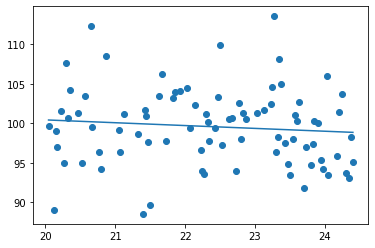

-0.09706360125152529


In [13]:
# https://www.w3schools.com/python/python_ml_linear_regression.asp
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

# Load a dataset.
df = pd.read_csv('powerproduction.csv')

# We are removing the non zero values
cleansed_data_2 = df.loc[df['power'] > 0 ]

greater_than_twenty_to_twenty_five = cleansed_data_2.loc[(cleansed_data_2['speed'] > 20) & (cleansed_data_2['speed']<= 24.498)]

x = greater_than_twenty_to_twenty_five['speed'].tolist()
y = greater_than_twenty_to_twenty_five['power'].tolist()

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

analyse_simple_linear_regression_r(greater_than_twenty_to_twenty_five)

# Python script that runs a web service based on the model, as above.

To run the code above as a web service you will need to download from my github folder the contents of the folder called

flask_web_project

![flask_project](flask_project.png)


**Navigate to the folder and run the following commands**

**python -m venv venv <br>
.\venv\scripts\activate.bat <br>
pip install -r requirements.txt <br>
set FLASK_APP=app.py <br>
flask run <br>**

![flask_project](flask_project2.png)
![flask_project](flask_project3.png)


**Open web browser and go to url http://127.0.0.1:5000/**
**Type in a number in the text box and click 'Submit' button to get the predicted energy from the wind speed**

![flask_project](flask_project4.png)

**The predicted energy from the wind speed will appear on the next screen, click 'Go Back' button to go to previous screen to try another value.**

![flask_project](flask_project5.png)




# Observation of the data

Before beginning any data assignment, I like to have a look at the raw data. The goal of this assignment is to produce a model that accurately predicts wind turbine power output from wind speed values using the powerproduction.csv data.

What does a cursory observation of the CSV data show us?
To help the reader see what I am seeing, I have edited screenshots of the original raw dataset.

![cursory_look_1](cursory_look_1.png)

![cursory_look_2](cursory_look_2.png)

![cursory_look_2a](cursory_look_2a.png)

![cursory_look_3](cursory_look_3.png)

Wind speeds below 0.325 and above 24.399 had no energy generated. 

I could only surmise from this, and from a discussion with someone else about the wind energy industry, is that wind turbines are not moving / turned off if wind speed is to too low or too high. Wind turbines can be turned off to reduce unneccessary wear and tear on machinery when speed is not adequate for producing enough energy or speed is dangerously too high.

_If a wind turbine isn’t turning because it’s too windy, or not windy enough, the owner of the wind turbine does not get paid.
https://www.scottishrenewables.com/news/576-blog-why-that-wind-turbine-isnt-turning

_'Modern wind turbines are designed to shut off or slow their blades during high winds. If the blades turn too fast, it can cause the entire structure to become unstable and then disintegrate.https://www.wind-watch.org/news/2019/02/20/high-winds-topple-turbine/

The solution I will make to approximately predict the likely energy output from wind speeds will require a solution that take into account the industry practice of turning the wind turbines off for high speeds and low speeds.

This will require a data cleanse.

Before I dive into doing a data cleanse, I will explain using the output of the Simple Linear Prediction model below some of the anomalies that will happen in Linear prediction without the data being cleansed.

# A Simple Linear Prediction Using User Input

In [14]:
import sklearn.linear_model as lin
import pandas as pd

# Load a dataset.
powerproduction = pd.read_csv('powerproduction.csv')

def f(speed, p):
    return p[0] + speed * p[1]

def predict_power_output(speed):
    return f(speed, p)

speed = powerproduction["speed"].to_numpy()
y = powerproduction["power"].to_numpy()

speed = speed.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(speed, y)
r = model.score(speed, y)
p = [model.intercept_, model.coef_[0]]

predict_power_output(int(20))

print('DEMOSTRATION OF WHY LINEAR REGRESSION WITH UNCLEANSED DATA DOES NOT MAKE SENSE')

print('\nPredicted Energy Output for 0.325 mph winds')
print(predict_power_output(0.325))
print('compare with real data that says 4.331')

print('\nPredicted Energy Output for 2mph winds')
print(predict_power_output(2))

print('\nPredicted Energy Output for 24.399 mph winds')
print(predict_power_output(24.399))
print('compare with real data that says 95.117')

print('\nPredicted Energy Output for 25 mph winds')
print(predict_power_output(25))

print('\nPredicted Energy Output for 60 mph winds')
print(predict_power_output(60))

DEMOSTRATION OF WHY LINEAR REGRESSION WITH UNCLEANSED DATA DOES NOT MAKE SENSE

Predicted Energy Output for 0.325 mph winds
-12.301684039263103
compare with real data that says 4.331

Predicted Energy Output for 2mph winds
-4.064711299710282

Predicted Energy Output for 24.399 mph winds
106.08451400968889
compare with real data that says 95.117

Predicted Energy Output for 25 mph winds
109.03998900459709

Predicted Energy Output for 60 mph winds
281.15583729376056


# POLYNOMIAL REGRESSION

In [15]:
import numpy
from sklearn.metrics import r2_score

df = pd.read_csv('powerproduction.csv')

x = df["speed"].to_numpy()
y = df["power"].to_numpy()

predict_power_output = numpy.poly1d(numpy.polyfit(x, y, 3))



print('DEMOSTRATION OF WHY POLYNOMIAL REGRESSION WITH UNCLEANSED DATA DOES NOT MAKE SENSE')

print('\nPredicted Energy Output for 0.325 mph winds')
print(predict_power_output(0.325))
print('compare with real data that says 4.331')

print('\nPredicted Energy Output for 2mph winds')
print(predict_power_output(2))

print('\nPredicted Energy Output for 24.399 mph winds')
print(predict_power_output(24.399))
print('compare with real data that says 95.117')

print('\nPredicted Energy Output for 25 mph winds')
print(predict_power_output(25))

print('\nPredicted Energy Output for 60 mph winds')
print(predict_power_output(60))

DEMOSTRATION OF WHY POLYNOMIAL REGRESSION WITH UNCLEANSED DATA DOES NOT MAKE SENSE

Predicted Energy Output for 0.325 mph winds
15.193218263880343
compare with real data that says 4.331

Predicted Energy Output for 2mph winds
0.47566103178469277

Predicted Energy Output for 24.399 mph winds
70.04864611395982
compare with real data that says 95.117

Predicted Energy Output for 25 mph winds
60.8647329444649

Predicted Energy Output for 60 mph winds
-5258.444843468935


### An observation of the Seaborn graphs below, shows anomaly data away from the main group

These anomalies cause distortions when trying to forecast.

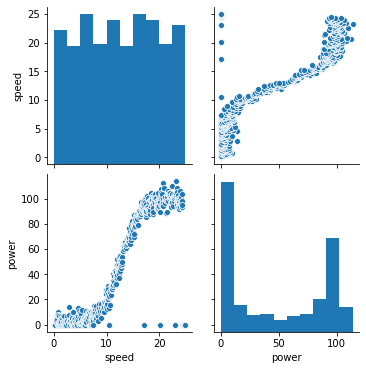

In [16]:
# Pick out two variables.
import seaborn as sns
sns.pairplot(powerproduction)

### Building in a control for low and high wind speeds
We know for a fact that 2mph winds can generate energy, see speeds between 0.3 and 3 generating energy, yet the above zero days distort the machine learning output
Not all results from a linear machine learning analysis of the data make sense

**predict_power_output(60)
For example a simple analysis of wind speed of 60 miles an hour would return an energy output of 281.155

We already know from a cursory look of the csv data, that no energy is produced from speeds above 24.399.
**We handle wind speeds above 24.399 with an if statement to return 0 energy output.**

**predict_power_output(2)
Another example of wind speed of 2 miles an hour, a simple analysis would return a negative energy output of -4.064


**We handle wind speeds of below 0.325 with an if statement to return 0 energy output**, as there is no evidence on the CSV file that the wind turbine consumes energy and generates negative energy values for low wind speeds.

The reader might query why the linear machine learning module in Python returns a negative energy value of -4.064 for a wind speed of 2mph, when there is wind speed data as low as 0.325 generating power. Typically turbines are able to generate electricity in winds of about 7mph https://www.scottishrenewables.com/news/576-blog-why-that-wind-turbine-isnt-turning However our CSV data indicates that these turbines can generate power from speeds as low as 0.325

The energy data that the wind turbine produces can be distorted by the fact that the owner of the wind turbine may have chosen to turn the wind turbine off on certain days, this could be for three reasons: 1) They’re being maintained, or need maintenance
2) It’s not windy enough for them to operate at all, or too windy for them to operate 3) There is no demand on the grid for the supply of the energy.

![cursory_look_3](cursory_look_3.png)


We do not know the reasons why no energy was generated on these windy days where wind speed was above 0.325 To have an accurate machine learning model, *it is my opinion* that you would strip out the days that the wind turbines were turned off for maintenance or because there was no demand for energy, as this data detracts from being able to accurately predict energy than can be produced from wind speed. 

While it is my opinion that the zero value anomaly days should be stripped out, other people may take a more holistic view to predicting power from the data provided, for example if people are interested in what the energy may be generated over a year, it would be reasonable to leave in the anomaly data, over a year there will be maintenance days.

However my machine learning algorithm is built to predict what energy will be generated on a single day when the machinery is working properly, it is not a holistic approach over a period of time that allows for days that the machinery may not be working.


![Zero Power Days](zero_power_days.png)


# Cleansing The Data And Building Controls Into The Code

In [17]:
import pandas as pd

# Load a dataset.
powerproduction = pd.read_csv('powerproduction.csv')

print(powerproduction.describe())

print(powerproduction.head())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000
   speed  power
0  0.000    0.0
1  0.125    0.0
2  0.150    0.0
3  0.225    0.0
4  0.275    0.0


In [18]:
cleansed_data_1 = powerproduction.loc[powerproduction['speed'] < 0.325 ]
cleansed_data_2 = powerproduction.loc[powerproduction['power'] > 0 ]
cleansed_data_3 = powerproduction.loc[powerproduction['speed'] > 24.399 ]

print(cleansed_data_1.head())
print(cleansed_data_2.head())
print(cleansed_data_3.head())



   speed  power
0  0.000    0.0
1  0.125    0.0
2  0.150    0.0
3  0.225    0.0
4  0.275    0.0
   speed  power
5  0.325  4.331
6  0.400  5.186
7  0.450  3.826
8  0.501  1.048
9  0.526  5.553
      speed  power
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0


In [19]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

frames = [cleansed_data_1, cleansed_data_2, cleansed_data_3]

result = pd.concat(frames)

print(result)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[466 rows x 2 columns]


### Observe the seaborn graph below, which now has less anomalies following the data cleanse

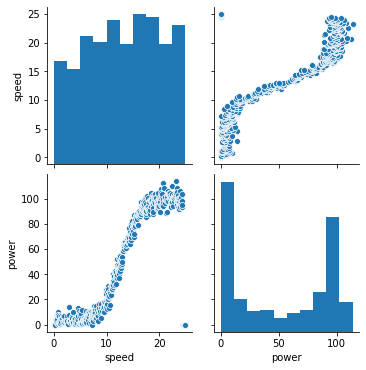

In [20]:
# Pick out two variables.
import seaborn as sns
sns.pairplot(result)

Instead of powerproduction variable being referenced to powerproduction.csv, we now shall reference it to the cleansed data result

In [21]:
import sklearn.linear_model as lin
import pandas as pd

# Load a dataset.
powerproduction = result

def f(speed, p):
    return p[0] + speed * p[1]

def predict_power_output_b(speed):
    return f(speed, p)

speed = powerproduction["speed"].to_numpy()
y = powerproduction["power"].to_numpy()

speed = speed.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(speed, y)
r = model.score(speed, y)
p = [model.intercept_, model.coef_[0]]

predict_power_output(int(20))

print('NEW PREDICTIONS WITH ZERO VALUE ANOMALIES CLEANSED')

print('\nPredicted Energy Output for 0.325 mph winds')
print(predict_power_output_b(0.325))
print('compare with real data that says 4.331')

print('\nPredicted Energy Output for 2mph winds')
print(predict_power_output_b(2))

print('\nPredicted Energy Output for 24.399 mph winds')
print(predict_power_output_b(24.399))
print('compare with real data that says 95.117')

print('\nPredicted Energy Output for 60 mph winds')
print(predict_power_output_b(60))

NEW PREDICTIONS WITH ZERO VALUE ANOMALIES CLEANSED

Predicted Energy Output for 0.325 mph winds
-12.054459858746995
compare with real data that says 4.331

Predicted Energy Output for 2mph winds
-3.7311282224516304

Predicted Energy Output for 24.399 mph winds
107.57293465598411
compare with real data that says 95.117

Predicted Energy Output for 60 mph winds
284.47975828807444


Even with the zero anomalies cleansed from the data set there are still issues with the linear regression forecasting.

Predicted Energy Output for 0.325 mph winds
-12.054459858746995
compare with real data that says 4.331

Predicted Energy Output for 2mph winds
-3.7311282224516304

Predicted Energy Output for 24.399 mph winds
107.57293465598411
compare with real data that says 95.117

One way to deal with this, I believe is to remove all zero value data from the set.

In [22]:
cleansed_data_2 = powerproduction.loc[powerproduction['power'] > 0 ]
print(cleansed_data_2.head())

   speed  power
5  0.325  4.331
6  0.400  5.186
7  0.450  3.826
8  0.501  1.048
9  0.526  5.553


In [23]:
import sklearn.linear_model as lin
import pandas as pd

# Load a dataset.
powerproduction = cleansed_data_2

def f(speed, p):
    return p[0] + speed * p[1]

def predict_power_output_b(speed):
    return f(speed, p)

speed = powerproduction["speed"].to_numpy()
y = powerproduction["power"].to_numpy()

speed = speed.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(speed, y)
r = model.score(speed, y)
p = [model.intercept_, model.coef_[0]]



print('NEW PREDICTIONS WITH ALL ZERO VALUES REMOVED')

print('\nPredicted Energy Output for 0.325 mph winds')
print(predict_power_output_b(0.325))
print('compare with real data that says 4.331')

print('\nPredicted Energy Output for 2mph winds')
print(predict_power_output_b(2))

print('\nPredicted Energy Output for 24.399 mph winds')
print(predict_power_output_b(24.399))
print('compare with real data that says 95.117')

print('\nPredicted Energy Output for 60 mph winds')
print(predict_power_output_b(60))

NEW PREDICTIONS WITH ALL ZERO VALUES REMOVED

Predicted Energy Output for 0.325 mph winds
-18.01156640483037
compare with real data that says 4.331

Predicted Energy Output for 2mph winds
-8.600029776551313

Predicted Energy Output for 24.399 mph winds
117.25609496185024
compare with real data that says 95.117

Predicted Energy Output for 60 mph winds
317.29198481460406


The predictions above still seem wildly out. I am not as concerned that the predicted energy output for 24.399 mph winds is
117.25609496185024 compared with real data that says 95.117, as there can be energy production surges, even with close ranges.

![Energy Surges](EnergySurges.png)

My theory is that these energy surges that occur in the higher ranges of wind speed numbers, mean that predicting energy output across the lower and mid range of wind speed numbers can be distorted when using the linear model across a large range of numbers.

So next I will try and make linear predictions on wind speeds using data between 

0 - 5 mph , 
'> 5 - 10 mph
'> 10 - 15 mph
'>15 - 20 mph
'>20 - 25 mph

So if a user inputs a wind speed between 0 - 5 mph, it will get a linear prediction from wind speed betwween 0 and 5.





In [24]:
import pandas as pd

# Load a dataset.
powerproduction = pd.read_csv('powerproduction.csv')

# We are removing the non zero values
cleansed_data_2 = powerproduction.loc[powerproduction['power'] > 0 ]

# filtering between values https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates

zero_to_five = cleansed_data_2.loc[(cleansed_data_2['speed'] > 0) & (cleansed_data_2['speed']< 5)]
greater_than_five_to_ten = cleansed_data_2.loc[(cleansed_data_2['speed'] > 5) & (cleansed_data_2['speed']< 10)]
greater_than_ten_to_fifteen = cleansed_data_2.loc[(cleansed_data_2['speed'] > 10) & (cleansed_data_2['speed']< 15)]
greater_than_fifteen_to_twenty = cleansed_data_2.loc[(cleansed_data_2['speed'] > 15) & (cleansed_data_2['speed']< 20)]
greater_than_twenty_to_twenty_five = cleansed_data_2.loc[(cleansed_data_2['speed'] > 20) & (cleansed_data_2['speed']< 25)]

print('With pandas filters we are able to filter data to just analyse power outputs between 0-5mph wind speeds')
print(zero_to_five)
print('Next we shall try and predict the power produced from a 2mph wind speed')


import sklearn.linear_model as lin
import pandas as pd

# Load a dataset.
powerproduction = zero_to_five # analysing power production from 0 - 5 mph wind speeds only

def f(speed, p):
    return p[0] + speed * p[1]

def predict_power_output_b(speed):
    return f(speed, p)

speed = powerproduction["speed"].to_numpy()
y = powerproduction["power"].to_numpy()

speed = speed.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(speed, y)
r = model.score(speed, y)
p = [model.intercept_, model.coef_[0]]



print('NEW PREDICTIONS WITH ALL ZERO VALUES REMOVED AND JUST FILTERING ON WIND SPEEDS BETWEEN 0 - 5 MPH')

print('\nPredicted Energy Output for 0.325 mph winds')
print(predict_power_output_b(0.325))
print('compare with real data that says 4.331')

print('\nPredicted Energy Output for 2mph winds')
print(predict_power_output_b(2))



With pandas filters we are able to filter data to just analyse power outputs between 0-5mph wind speeds
    speed   power
5   0.325   4.331
6   0.400   5.186
7   0.450   3.826
8   0.501   1.048
9   0.526   5.553
..    ...     ...
88  4.780  10.444
90  4.905   7.060
91  4.930   0.946
92  4.955   1.907
93  4.980   1.681

[68 rows x 2 columns]
Next we shall try and predict the power produced from a 2mph wind speed
NEW PREDICTIONS WITH ALL ZERO VALUES REMOVED AND JUST FILTERING ON WIND SPEEDS BETWEEN 0 - 5 MPH

Predicted Energy Output for 0.325 mph winds
4.290517451330689
compare with real data that says 4.331

Predicted Energy Output for 2mph winds
4.223299740164377


In [25]:
import pandas as pd

# Load a dataset.
powerproduction = pd.read_csv('powerproduction.csv')

# We are removing the non zero values
cleansed_data_2 = powerproduction.loc[powerproduction['power'] > 0 ]

# filtering between values https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates

zero_to_five = cleansed_data_2.loc[(cleansed_data_2['speed'] > 0) & (cleansed_data_2['speed']< 5)]
greater_than_five_to_ten = cleansed_data_2.loc[(cleansed_data_2['speed'] > 5) & (cleansed_data_2['speed']< 10)]
greater_than_ten_to_fifteen = cleansed_data_2.loc[(cleansed_data_2['speed'] > 10) & (cleansed_data_2['speed']< 15)]
greater_than_fifteen_to_twenty = cleansed_data_2.loc[(cleansed_data_2['speed'] > 15) & (cleansed_data_2['speed']< 20)]
greater_than_twenty_to_twenty_five = cleansed_data_2.loc[(cleansed_data_2['speed'] > 20) & (cleansed_data_2['speed']< 25)]

print('With pandas filters we are able to filter data to just analyse power outputs between 20-25mph wind speeds')
print(greater_than_twenty_to_twenty_five)
print('Next we shall try and predict the power produced from a 24.399 mph wind speed')


import sklearn.linear_model as lin
import pandas as pd

# Load a dataset.
powerproduction = greater_than_twenty_to_twenty_five # analysing power production from 20 - 25 mph wind speeds only

def f(speed, p):
    return p[0] + speed * p[1]

def predict_power_output_b(speed):
    return f(speed, p)

speed = powerproduction["speed"].to_numpy()
y = powerproduction["power"].to_numpy()

speed = speed.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(speed, y)
r = model.score(speed, y)
p = [model.intercept_, model.coef_[0]]



print('NEW PREDICTIONS WITH ALL ZERO VALUES REMOVED AND JUST FILTERING ON WIND SPEEDS BETWEEN 20 - 25 MPH')

print('\nPredicted Energy Output for 24.399 mph winds')
print(predict_power_output_b(24.399))
print('compare with real data that says 95.117')


With pandas filters we are able to filter data to just analyse power outputs between 20-25mph wind speeds
      speed    power
403  20.045   99.697
405  20.120   89.078
406  20.145   99.029
407  20.170   96.963
408  20.220  101.507
..      ...      ...
485  24.249  103.700
486  24.299   93.694
487  24.349   93.078
488  24.374   98.223
489  24.399   95.117

[85 rows x 2 columns]
Next we shall try and predict the power produced from a 24.399 mph wind speed
NEW PREDICTIONS WITH ALL ZERO VALUES REMOVED AND JUST FILTERING ON WIND SPEEDS BETWEEN 20 - 25 MPH

Predicted Energy Output for 24.399 mph winds
98.86284886113515
compare with real data that says 95.117


The predicted energy output in now much closer to the real data.

# 2. Python script that runs a web service based on the model, as above.
# A Simple Flask Application Adapting The Above Code

To run the script below I have created a file called app.py This is a Python Application which uses FLASK and uses the method POST to request information from a HTML form.

I reference my question on Stackoverflow 
https://stackoverflow.com/questions/64443057/how-do-i-use-flask-to-return-results-of-a-function-to-web-page

also a similar solution using FLASK and the post method here
https://stackoverflow.com/questions/12277933/send-data-from-a-textbox-into-flask

Using the above references for how to use FLASK, and an adaption of Ian's demonstration of Linear prediction, I was able to make up the follow code.

# CODE USED FOR FLASK app.py

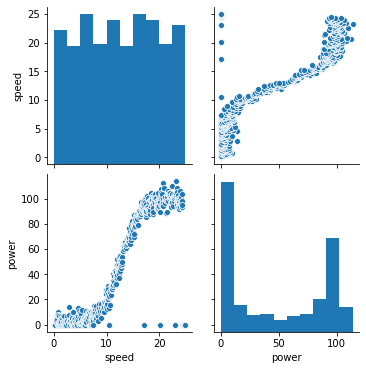

In [26]:
import sklearn.linear_model as lin
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Load a dataset.
mygraphdata = pd.read_csv('powerproduction.csv')

#https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/models.ipynb
#https://stackoverflow.com/questions/30336324/seaborn-load-dataset
#https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/


#https://stackoverflow.com/questions/32244753/how-to-save-a-seaborn-plot-into-a-file
sns_plot = sns.pairplot(mygraphdata)
sns_plot.savefig('static/images/plot.png')


import algorithm_for_wind_speed #uses algorithms from algorithm_for_wind_speed.py


from flask import Flask, request, render_template

app = Flask(__name__)

@app.route('/')
def my_form():
    return render_template('my-form.html')

@app.route('/', methods=['POST'])
def my_form_post():
    text = request.form['text']
    return """ 
    <style>
    table.blueTable {
  border: 1px solid #1C6EA4;
  background-color: #EEEEEE;
  width: 100%;
  text-align: left;
  border-collapse: collapse;
}
table.blueTable td, table.blueTable th {
  border: 1px solid #AAAAAA;
  padding: 3px 2px;
}
table.blueTable tbody td {
  font-size: 13px;
}
table.blueTable tr:nth-child(even) {
  background: #D0E4F5;
}
table.blueTable thead {
  background: #1C6EA4;
  background: -moz-linear-gradient(top, #5592bb 0%, #327cad 66%, #1C6EA4 100%);
  background: -webkit-linear-gradient(top, #5592bb 0%, #327cad 66%, #1C6EA4 100%);
  background: linear-gradient(to bottom, #5592bb 0%, #327cad 66%, #1C6EA4 100%);
  border-bottom: 2px solid #444444;
}
table.blueTable thead th {
  font-size: 15px;
  font-weight: bold;
  color: #FFFFFF;
  border-left: 2px solid #D0E4F5;
}
table.blueTable thead th:first-child {
  border-left: none;
}

table.blueTable tfoot {
  font-size: 14px;
  font-weight: bold;
  color: #FFFFFF;
  background: #D0E4F5;
  background: -moz-linear-gradient(top, #dcebf7 0%, #d4e6f6 66%, #D0E4F5 100%);
  background: -webkit-linear-gradient(top, #dcebf7 0%, #d4e6f6 66%, #D0E4F5 100%);
  background: linear-gradient(to bottom, #dcebf7 0%, #d4e6f6 66%, #D0E4F5 100%);
  border-top: 2px solid #444444;
}
table.blueTable tfoot td {
  font-size: 14px;
}
table.blueTable tfoot .links {
  text-align: right;
}
table.blueTable tfoot .links a{
  display: inline-block;
  background: #1C6EA4;
  color: #FFFFFF;
  padding: 2px 8px;
  border-radius: 5px;
}
</style>   
    
    <img src="static/images/Wind_turbine_Holderness.jpg" alt="https://commons.wikimedia.org/wiki/File:Wind_turbine_Holderness.jpg">
    <table class="blueTable"><thead><tr><th><centre>Predict Energy Output From Wind Speed of """ + text + """ mph</centre></th></tr></thead><tbody><tr><td>""" + str(algorithm_for_wind_speed.receive_text_from_form(float(text))) + """ </td></tr></tbody></tr></table>
    <img src="static/images/plot.png" alt="A Matplotlibplot">
    <button onclick="goBack()">Go Back</button>

<script>
function goBack() {
  window.history.back();
}
</script>
    """ 



# CODE USED FOR FLASK ALGORITHM algorithm_for_wind_speed.py

In [27]:
import sklearn.linear_model as lin
import pandas as pd

def do_linear_regression(data,text):

    # Load a dataset.
    text = text
    powerproduction = data
    def f(speed, p):
        return p[0] + speed * p[1]

    def predict_power_output(speed):
        return round(f(speed, p),2)

    speed = powerproduction["speed"].to_numpy()
    y = powerproduction["power"].to_numpy()

    speed = speed.reshape(-1, 1)

    model = lin.LinearRegression()
    model.fit(speed, y)
    r = model.score(speed, y)
    p = [model.intercept_, model.coef_[0]]

    return(predict_power_output(float(text)))

# Load a dataset.
df = pd.read_csv('powerproduction.csv')

# We are removing the non zero values
cleansed_data_2 = df.loc[df['power'] > 0 ]

# filtering between values see https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates



# If a user types wind speeds lower than 0.275 or equal higher than 24.499, it will be handled with an if statement and return 0

def receive_text_from_form(text):
    text = text
    if text <= 0.275:
        return 0

    if text >= 24.499:
        return 0


    #if a user inputs a wind speed between 0 - 5 mph, they will get a linear prediction from wind speed data betwween 0 and 5 mph.

    if text > 0.275 and text <= 5:
        zero_to_five = cleansed_data_2.loc[(cleansed_data_2['speed'] > 0.275) & (cleansed_data_2['speed']<= 5)]
        return do_linear_regression(zero_to_five,text)


    #if a user inputs a wind speed between 5 - 10 mph, they will get a linear prediction from wind speed data betwween 5 and 10 mph.

    if text > 5 and text <= 10:
        greater_than_five_to_ten = cleansed_data_2.loc[(cleansed_data_2['speed'] > 5) & (cleansed_data_2['speed']<= 10)]
        return do_linear_regression(greater_than_five_to_ten,text)


    #if a user inputs a wind speed between 10 - 15 mph, they will get a linear prediction from wind speed data betwween 10 and 15 mph.
        
    if text > 10 and text <= 15:
        greater_than_ten_to_fifteen = cleansed_data_2.loc[(cleansed_data_2['speed'] > 10) & (cleansed_data_2['speed']<= 15)]
        return do_linear_regression(greater_than_ten_to_fifteen,text)

    #if a user inputs a wind speed between 15 - 20 mph, they will get a linear prediction from wind speed data betwween 15 and 20 mph.

    if text > 15 and text <= 20:
        greater_than_fifteen_to_twenty = cleansed_data_2.loc[(cleansed_data_2['speed'] > 15) & (cleansed_data_2['speed']<= 20)]
        return do_linear_regression(greater_than_fifteen_to_twenty,text)

        #if a user inputs a wind speed between 20 - 25 mph, they will get a linear prediction from wind speed data betwween 20 and 25 mph.

    if text > 20 and text <= 24.498:
        greater_than_twenty_to_twenty_five = cleansed_data_2.loc[(cleansed_data_2['speed'] > 20) & (cleansed_data_2['speed']<= 24.498)]
        return do_linear_regression(greater_than_twenty_to_twenty_five,text)


### Creating the server

python -m venv venv<br>
.\venv\Scripts\activate.bat<br>
pip install pandas<br>
pip install numpy<br>
pip install scikit-learn<br>
pip install flask<br>
pip freeze<br>
pip freeze > requirements.txt<br>
set FLASK_APP=app.py<br>
flask run<br>

### Running again

python -m venv venv<br>
.\venv\scripts\activate.bat<br>
pip install -r requirements.txt<br>
set FLASK_APP=app.py<br>
flask run<br>

# 3. Dockerfile to build and run the web service in a container.


My folder contains two files to run the flask web project


**flask_web_project_Ian_McLoughlin_Docker_Example**
This contains Dockerfile, dockerignore that I created after watching Ian's McLoughlin's video https://web.microsoftstream.com/video/03bfee62-fdeb-4dbe-a7d2-393d1aa40b66
34min 21second in

**flask_web_project_Freelancer_Docker_Example**
This contains Dockerfile that I got a Freelancer to help me with before watching Ian's video because I was unable to install the docker download (see error screenshots below)

I initially read  the following information on https://docs.docker.com/compose/gettingstarted/

> Create a Dockerfile
In this step, you write a Dockerfile that builds a Docker image. The image contains all the dependencies the Python application requires, including Python itself.

> In your project directory, create a file named Dockerfile and paste the following:

>FROM python:3.7-alpine <br>
WORKDIR /code <br>
ENV FLASK_APP=app.py <br>
ENV FLASK_RUN_HOST=0.0.0.0 <br>
RUN apk add --no-cache gcc musl-dev linux-headers <br>
COPY requirements.txt requirements.txt <br>
RUN pip install -r requirements.txt <br>
EXPOSE 5000 <br>
COPY . . <br>
CMD ["flask", "run"] <br>

However there were some things that I was not really clear on in my understanding because of references to 'python:3.7-alpine' and 'RUN apk add --no-cache gcc musl-dev linux-headers'.
I don't work with a linux system and only have a vague recollection familiarity of it, I also didn't understand the suffix alpine added after Python.

After I have navigated to the folder where my flask project is contained, this is how I currently run the web service from the command line in Windows

python -m venv venv
.\venv\Scripts\activate.bat
pip install -r requirements.txt
set FLASK_APP=app.py
flask run

Advice to my question on Stackoverflow wasn't sufficient in detail and the question was closed
https://stackoverflow.com/questions/65059142/how-do-i-create-a-docker-file-what-do-i-do-with-it

To learn how to create A Docker File I went to this website
https://www.docker.com/get-started

Downloaded an application called Docker Desktop download for windows
https://desktop.docker.com/win/stable/Docker%20Desktop%20Installer.exe

I then followed the steps, but was not able to move past the errors

![docker](docker/Docker1.png)
![docker](docker/Docker2.png)
![docker](docker/Docker3.png)
![docker](docker/Docker4.png)
![docker](docker/Docker5.png)
![docker](docker/Docker6.png)
![docker](docker/Docker7.png)

Failing being able to get the docker creation software to work and not finding anything really self explanatory, or help on the stackoverflow community, I did have to consult with a paid expert on Fiverr (https://www.fiverr.com/tgamage/create-docker-file-for-your-requirement) building a docker file for the final docker file requirement because I was unable to run Docker for Desktop.

https://github.com/g00387822/Machine_Learning_Project/blob/main/docker/Dockerfile.txt
(FYI : dockerfile should not have any extention and it must need to be "Dockerfile", some times if your using mac while you download file t will save it as dockerfile.txt which will stop working)

If any of the dockerfiles have converted to text, the fix is to use Notepad++ to save as All type

>A Dockerfile has no extension . if your using docker on docker on windows use notepad ++ to create a dockerfile while saving select “All type “ and save the file name as “Dockerfile”. https://stackoverflow.com/questions/50042514/what-is-the-dockerfile-extension/50867386

------------------------------------------------------------------------------
This is freelancer version of Dockerfile

FROM ubuntu:16.04<br>

RUN apt-get update -y && \<br>
    apt-get install -y python-pip python-dev<br>

#Copy project files to container<br>
COPY . /app/<br>

#change work directory<br>
WORKDIR /app<br>

#install dependencies<br>
RUN pip install -r requirements.txt<br>

#if you want to add custom commands you can add here<br> 
#RUN <your command><br>
#eg: RUN python -m venv venv<br>


ENTRYPOINT [ "python" ]<br>

CMD [ "app.py" ]<br>

#application port. <br>
EXPOSE 5000<br>
------------------------------------------------------------------------------
The guide for using this is here
https://github.com/g00387822/Machine_Learning_Project/blob/main/docker/Guide.docx
------------------------------------------------------------------------------
This is my adaption of Ian McLoughlin's Dockerfile version after watching his video 
    
FROM python:3<br>
WORKDIR /usr/src/app<br>
COPY requirements.txt ./<br>
RUN pip install --no-cache-dir -r requirements.txt<br>
COPY . .<br>
ENV FLASK_APP=app.py<br>
CMD flask run --host=0.0.0.0<br>
<br>
I am not sure at this point if these will run as unable to install Docker software, but will hope to test on Linux other systems in the future.
    

# 4. Standard items in a git repository such as a README.

This git repository contains

Jupyter Notebook: powerproduction.ipynb
README.MD
requirements.txt
powerproduction.csv

app.py

and within the templates folder

my-form.html

* to do and add 

gitignore
dockerfile


## Credits

The main solution I used for this project came from Dr Ian McLoughlin's demo of sklearn.linear_model and his demo of seaborn.
The video of Dr Ian McLoughlin's demonstration can be seen here https://web.microsoftstream.com/video/08404c4e-fe8b-4b84-832e-6bee57b5b160 and the notebook relating to the video can be found here https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/models.ipynb

## Visualisation of the data
When Dr McLoughlin was demoing the seaborn sns.regplot method, he demonstrated a great visualisation of the relationship between two variables (penguin flipper length and penguin body mass). As the powerproduction.csv only used two variables, speed and energy, I was able to quickly adapt the code from Dr McLoughlin's example to visualise the relationship between speed and energy.

**Dr McLoughlin's code**


> import seaborn as sns

> penguins = sns.load_dataset("penguins")

> flipper = penguins[["body_mass_g", "flipper_length_mm"]].dropna()
sns.regplot(x="body_mass_g", y="flipper_length_mm", data=penguins)

**My adaption of code**

>import seaborn as sns
import pandas as pd

>powerproduction = pd.read_csv('powerproduction.csv')

>poweranalysis = powerproduction[["speed", "power"]].dropna()
sns.regplot(x="speed", y="power", data=powerproduction)


_the main adaption I had to make to my code was importing the pandas module so that I could load the csv data for analysis, whereas Dr McLoughlin's code used a dataset called penguins which was already inbuilt into the seaborn module_


This visualisation of the data on a linear graph meant that I could quite quickly see whether the output analysis of the inbuilt methods of sklearn were likely to be correct approximations and not wildly out.